In [21]:
#1 What is the average rating for each product category
import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Filter out non-numeric values in the 'rating' column
df = df[pd.to_numeric(df['rating'], errors='coerce').notnull()]

# Convert the rating to a float
df['rating'] = df['rating'].astype(float)

# Split categories into individual categories
df['categories'] = df['category'].str.split('|')

# Explode the categories into separate rows
df_exploded = df.explode('categories')

# Calculate the average rating for each category
average_rating_per_category = df_exploded.groupby('categories')['rating'].mean().reset_index()

# Sort the result by average rating in descending order
average_rating_per_category_sorted = average_rating_per_category.sort_values(by='rating', ascending=False)

average_rating_per_category_sorted

,categories,rating
278,Tablets,4.6
270,StreamingClients,4.5
168,MediaStreamingDevices,4.5
47,CoffeePresses,4.5
272,SurgeProtectors,4.5
...,...,...
0,3DGlasses,3.5
200,PCHeadsets,3.5
74,DustCovers,3.4
45,CoffeeGrinders,3.3


In [23]:
#2 What are the top rating_count products by category
# Fill missing values in the 'rating_count' column with 0
import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Fill missing values in the 'rating_count' column with 0 and convert to numeric
df['rating_count'] = df['rating_count'].fillna('0').str.replace(',', '').astype(int)

# Split categories into individual categories
df['categories'] = df['category'].str.split('|')

# Explode the categories into separate rows
df_exploded = df.explode('categories')

# Find the top rating_count products by category
top_rating_count_products_by_category = df_exploded.loc[df_exploded.groupby('categories')['rating_count'].idxmax()]

# Sort the result by category
top_rating_count_products_by_category_sorted = top_rating_count_products_by_category.sort_values(by='categories')

# Display relevant columns: categories, product_name, and rating_count
top_rating_count_products_by_category_sorted[['categories', 'product_name', 'rating_count']]

,categories,product_name,rating_count
312,3DGlasses,Irusu Play VR Plus Virtual Reality Headset wit...,621
268,AVReceivers&Amplifiers,Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...,897
788,Accessories,SanDisk Ultra SDHC UHS-I Card 32GB 120MB/s R f...,69585
148,Accessories,BlueRigger Digital Optical Audio Toslink Cable...,30023
630,Accessories,"SYVO WT 3130 Aluminum Tripod (133CM), Universa...",27139
...,...,...,...
143,WirelessUSBAdapters,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692
143,WirelessUSBAdapters,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692
854,WoodenPencils,Apsara Platinum Pencils Value Pack - Pack of 20,5036
854,WoodenPencils,Apsara Platinum Pencils Value Pack - Pack of 20,5036


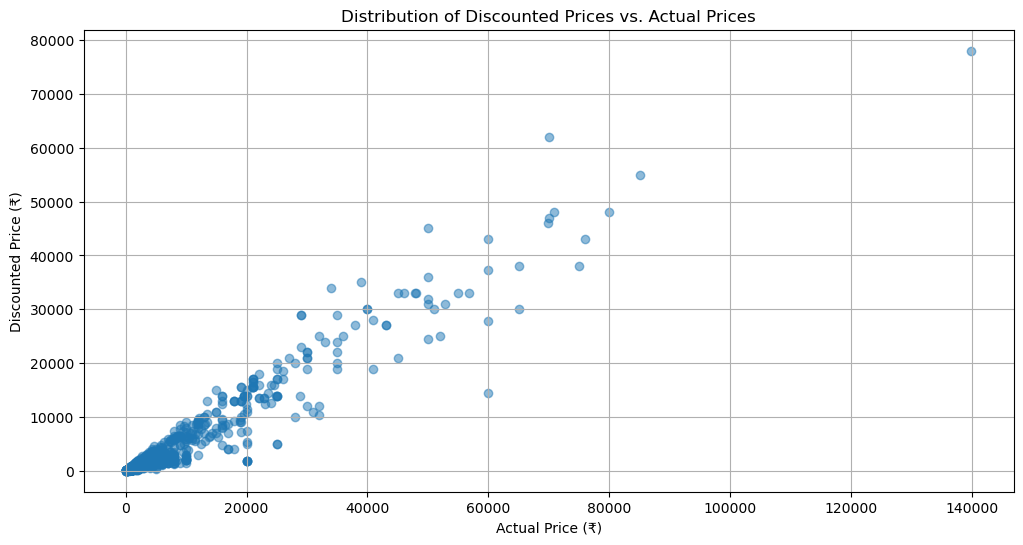

In [25]:
#3 What is the distribution of discounted prices vs. actual prices
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Extract and clean the discounted price and actual price data
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Drop rows with missing or zero values in price columns
df = df.dropna(subset=['discounted_price', 'actual_price'])
df = df[(df['discounted_price'] > 0) & (df['actual_price'] > 0)]

# Plot the distribution of discounted prices vs. actual prices
plt.figure(figsize=(12, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.grid(True)
plt.show()

In [1]:
#4. How does the average discount percentage vary across categories?
import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Extract and clean the discount percentage
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Split categories into individual categories
df['categories'] = df['category'].str.split('|')

# Explode the categories into separate rows
df_exploded = df.explode('categories')

# Calculate the average discount percentage for each category
average_discount_percentage = df_exploded.groupby('categories')['discount_percentage'].mean().reset_index()

# Sort the result by average discount percentage in descending order
average_discount_percentage_sorted = average_discount_percentage.sort_values(by='discount_percentage', ascending=False)

average_discount_percentage_sorted.head()

,categories,discount_percentage
26,CableConnectionProtectors,90.0
213,PhoneCharms,90.0
76,Earpads,90.0
74,DustCovers,87.5
248,Shower&WallMounts,82.0


In [2]:
#5. What are the most popular product names?
# Fill missing values in the 'rating_count' column with 0
df['rating_count'] = df['rating_count'].fillna('0').str.replace(',', '').astype(int)

# Count the number of reviews for each product
popular_product_names = df.groupby('product_name')['rating_count'].sum().reset_index()

# Sort the result by rating count in descending order
popular_product_names_sorted = popular_product_names.sort_values(by='rating_count', ascending=False)

# Top 5 most popular product names
top_5_popular_product_names = popular_product_names_sorted.head(5)
top_5_popular_product_names

,product_name,rating_count
101,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
511,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177
1256,boAt Bassheads 100 in Ear Wired Earphones with...,363713


In [3]:
#6 What are the most popular product keywords?
from collections import Counter
import re

# Extract keywords from the about_product descriptions
def extract_keywords(text):
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    return words

keywords = df['about_product'].dropna().apply(extract_keywords)
all_keywords = [keyword for sublist in keywords for keyword in sublist]

# Count the occurrences of each keyword
keyword_counts = Counter(all_keywords)

# Top 10 most common keywords
most_common_keywords = keyword_counts.most_common(10)
most_common_keywords

[('and', 5289),
 ('the', 4565),
 ('to', 3846),
 ('with', 3143),
 ('for', 2586),
 ('of', 2106),
 ('a', 2007),
 ('your', 1869),
 ('in', 1622),
 ('is', 1483)]

In [13]:
# 7 What are the most popular product reviews?
# Extract the review titles and count their occurrences
review_titles = df['review_title'].str.split(',')
review_titles_exploded = review_titles.explode()

# Count the occurrences of each review title
popular_review_titles = review_titles_exploded.value_counts().reset_index()
popular_review_titles.columns = ['review_title', 'count']

# Top 5 most popular product reviews
top_5_popular_reviews = popular_review_titles.head(5)
top_5_popular_reviews

,review_title,count
0,Good,691
1,Good product,443
2,Value for money,183
3,Nice,171
4,Nice product,150


In [26]:
#8-What is the correlation between discounted_price and rating?
import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Extract and clean the discounted price data
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean the rating data by removing non-numeric values
df = df[pd.to_numeric(df['rating'], errors='coerce').notnull()]
df['rating'] = df['rating'].astype(float)

# Drop rows with missing values in discounted_price and rating
df = df.dropna(subset=['discounted_price', 'rating'])

# Calculate the correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'])

correlation

0.12033741712288534

In [28]:
#9  What are the Top 5 categories based on the highest ratings?
import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Clean the rating column by removing non-numeric values
df = df[pd.to_numeric(df['rating'], errors='coerce').notnull()]

# Convert the rating to a float
df['rating'] = df['rating'].astype(float)

# Split categories into individual categories
df['categories'] = df['category'].str.split('|')

# Explode the categories into separate rows
df_exploded = df.explode('categories')

# Calculate the average rating for each category
average_rating_per_category = df_exploded.groupby('categories')['rating'].mean().reset_index()

# Sort the categories by average rating in descending order and select the top 5
top_5_categories = average_rating_per_category.sort_values(by='rating', ascending=False).head(5)

top_5_categories

,categories,rating
278,Tablets,4.6
270,StreamingClients,4.5
168,MediaStreamingDevices,4.5
47,CoffeePresses,4.5
272,SurgeProtectors,4.5


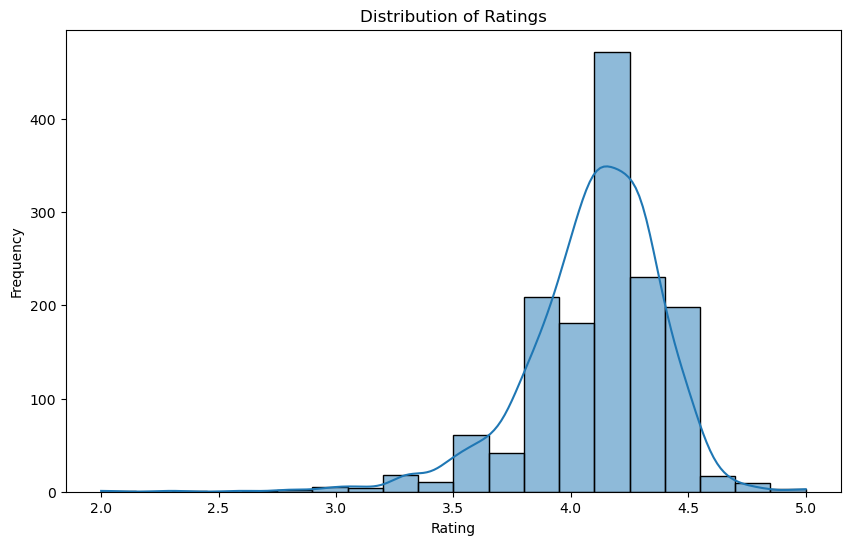

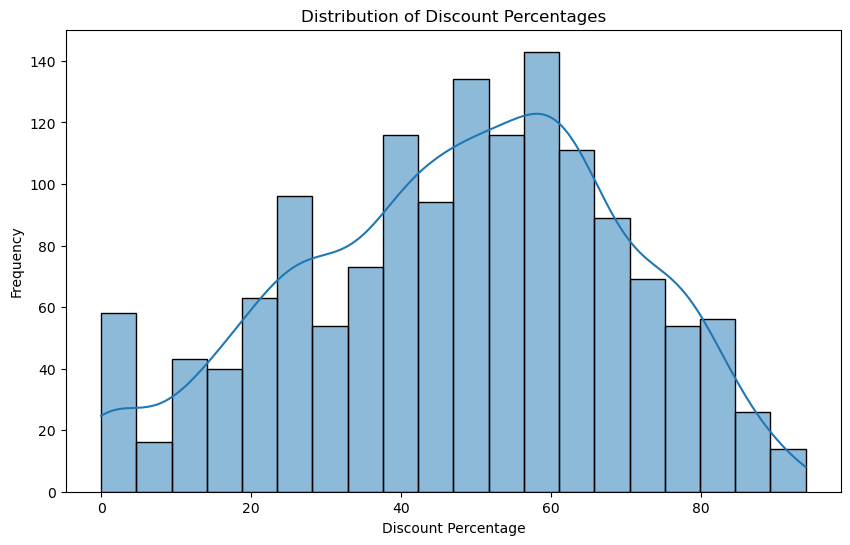

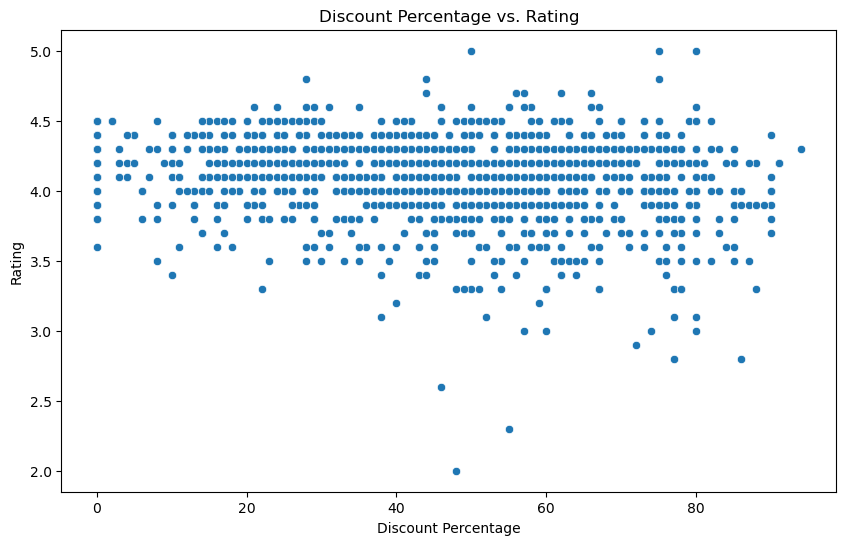

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0       

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'amazon.csv'  # Change this to your file path
amazon_data = pd.read_csv(file_path)

# Data Cleaning and Transformation
amazon_data['discounted_price'] = amazon_data['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].replace('[₹,]', '', regex=True).astype(float)
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].replace('[%,]', '', regex=True).astype(float)
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')
amazon_data['rating_count'] = amazon_data['rating_count'].replace(',', '', regex=True).astype(float)
amazon_data['rating_count'].fillna(0, inplace=True)

# Remove duplicates
amazon_data.drop_duplicates(inplace=True)

# Feature Engineering
amazon_data['discount_amount'] = amazon_data['actual_price'] - amazon_data['discounted_price']

# Split the 'category' column into separate columns
categories_expanded = amazon_data['category'].str.split('|', expand=True)
categories_expanded.columns = [f'category_level_{i+1}' for i in range(categories_expanded.shape[1])]

# Combine the original dataframe with the expanded categories
amazon_data_expanded = pd.concat([amazon_data, categories_expanded], axis=1)

# Aggregation to calculate average discount percentage and average rating per top-level category
category_agg = amazon_data_expanded.groupby('category_level_1').agg({
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'sum'
}).reset_index()

# Rename columns for clarity
category_agg.columns = ['category', 'avg_discount_percentage', 'avg_rating', 'total_reviews']

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['discount_percentage'], bins=20, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_data, x='discount_percentage', y='rating')
plt.title('Discount Percentage vs. Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

# Display results
print(amazon_data_expanded.head())
print(category_agg.head())

In [ ]:
#new code using spotify.csv file 

In [30]:
# 1. Data Quality Check
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
# Check for missing values and duplicate rows
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Handle missing values by dropping rows with any missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27


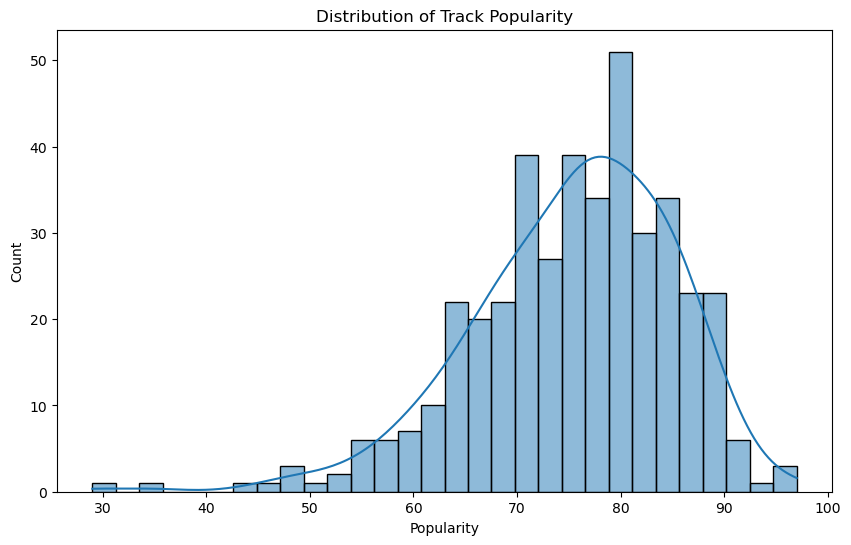

In [31]:
# 2. Distribution of popularity among the tracks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe from the uploaded file
file_path = 'spotify.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Data Quality Check: Handle missing values and remove duplicate rows
df_cleaned = df.dropna().drop_duplicates()

# Distribution of popularity among the tracks
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

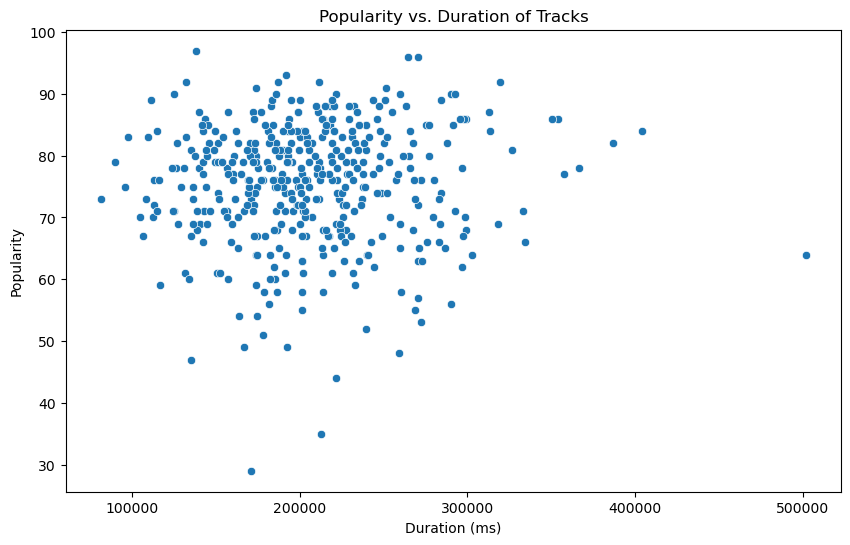

In [32]:
# 3. Relationship between popularity and duration of tracks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df_cleaned)
plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

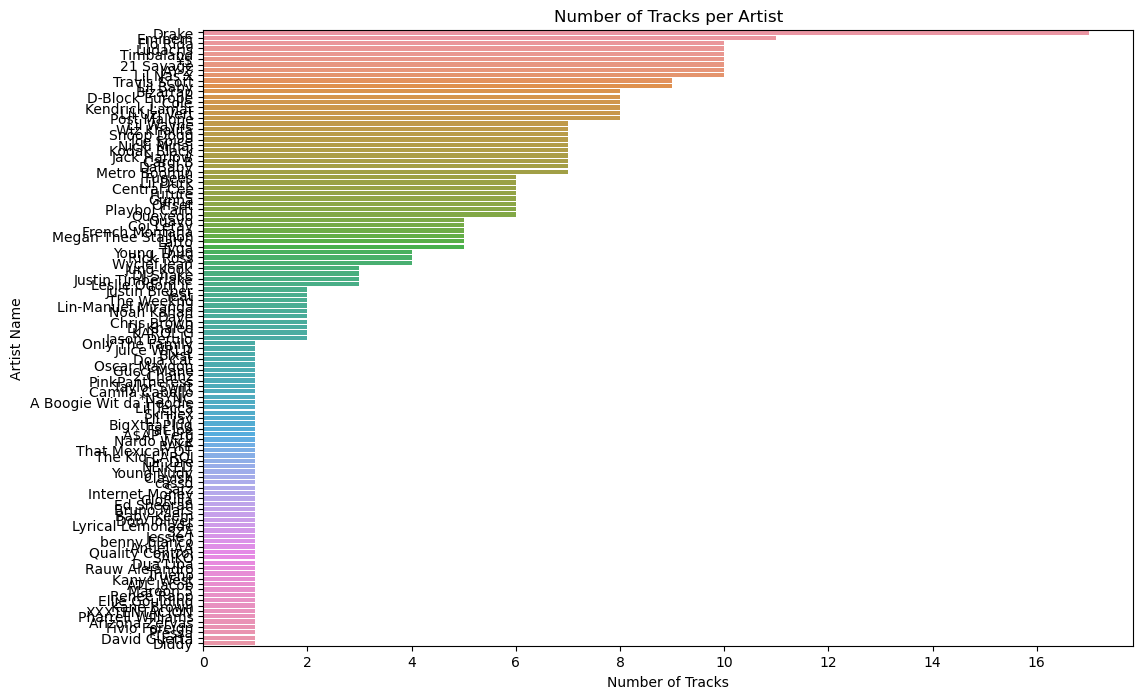

In [33]:
# 4. Artist with the highest number of tracks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df_cleaned, order=df_cleaned['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

In [34]:
# 5. Top 5 least popular tracks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
least_popular_tracks = df_cleaned.nsmallest(5, 'Popularity')[['Artist', 'Track ID', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)

Top 5 Least Popular Tracks:
              Artist                Track ID  Popularity
207          Pressa  6EfJ8Ct3GHbBz2YlyPnMYb          29
231   Justin Bieber  7jAVt70Xdg8EwOtsFB1ZqK          35
413  French Montana  3fBsEOnzwtlkpS0LxXAZhN          44
225        Lil Baby  2uUFVnVFERNxUdcmvEs7LB          47
407     Wyclef Jean  28hgx2bWXcaBJeC9zVwrBq          48


In [44]:
# 6. Top 5 most popular artists and their average popularity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
top_artists = df_cleaned['Artist'].value_counts().head(5).index
avg_popularity = df_cleaned[df_cleaned['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average Popularity of Top 5 Artists:\n", avg_popularity)

Average Popularity of Top 5 Artists:
 Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [47]:
# 7. Most popular tracks of the top 5 artists
import pandas as pd

# Load the data
file_path = 'spotify.csv'  # Update this with the correct file path
spotify_data = pd.read_csv(file_path)

# Check the first few rows to understand the structure of the data
print(spotify_data.head())

# Assuming the data has columns 'artist', 'track', and 'popularity'

# Group by artist and calculate the average popularity
artist_popularity = spotify_data.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity in descending order and get the top 5
top_artists = artist_popularity.sort_values(by='Popularity', ascending=False).head(5)['Artist']

# Filter the original dataframe to get tracks by these top 5 artists
top_tracks = spotify_data[spotify_data['Artist'].isin(top_artists)]

# For each of these artists, find their most popular tracks
most_popular_tracks = top_tracks.sort_values(by='Popularity', ascending=False).groupby('Artist').head(1).reset_index(drop=True)

# Display the most popular tracks of the top 5 artists
print(most_popular_tracks)

  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  
         Artist                    Track Name  Popularity  Duration (ms)  \
0            ¥$                      CARNIVAL          96         264324   
1  Travis Scott    FE!N (feat. Playboi Carti)          93         191700   
2         cassö                         Prada          92         132359   
3        Trueno  Mamichula - con Nicki Nicole  

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


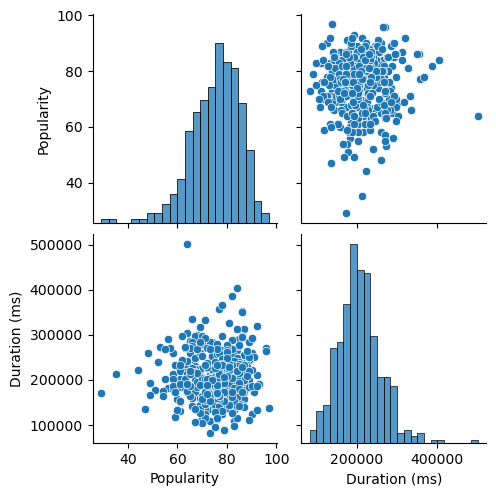

In [41]:
# 8. Pair plot for numerical variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
sns.pairplot(df_cleaned[['Popularity', 'Duration (ms)']])
plt.show()

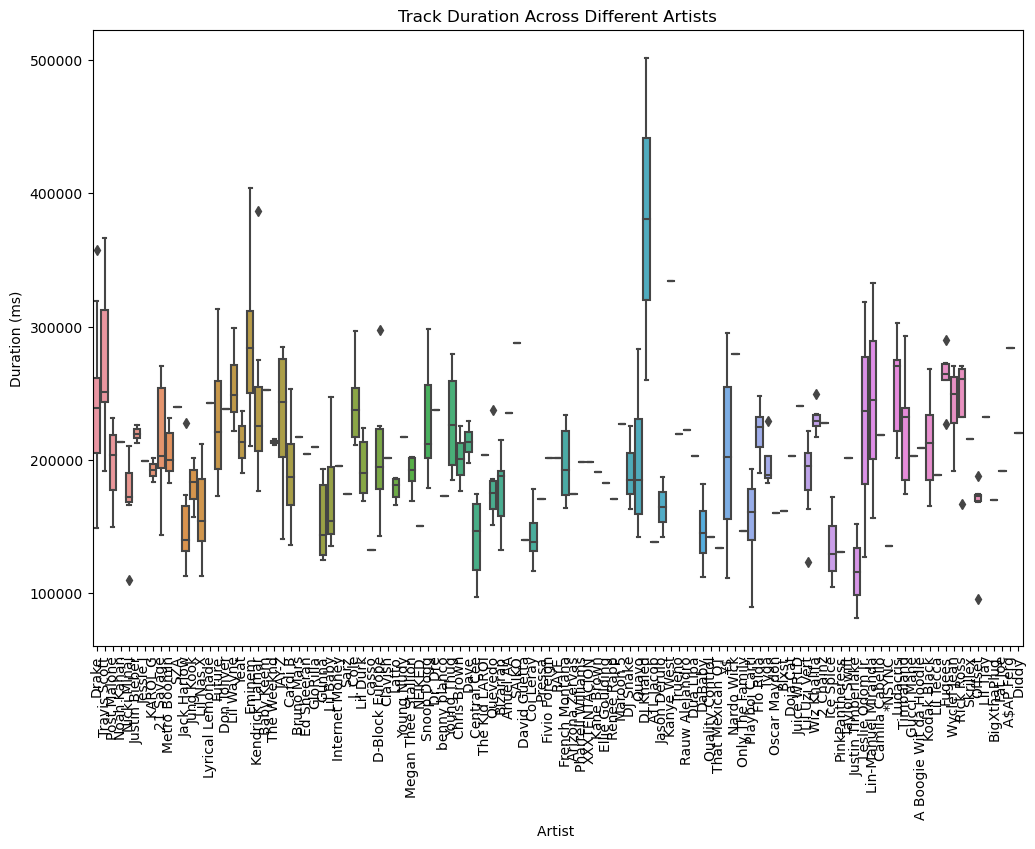

In [42]:
# 9. Duration of tracks across different artists
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'
df = pd.read_csv(file_path)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_cleaned)
plt.title('Track Duration Across Different Artists')
plt.xlabel('Artist ')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

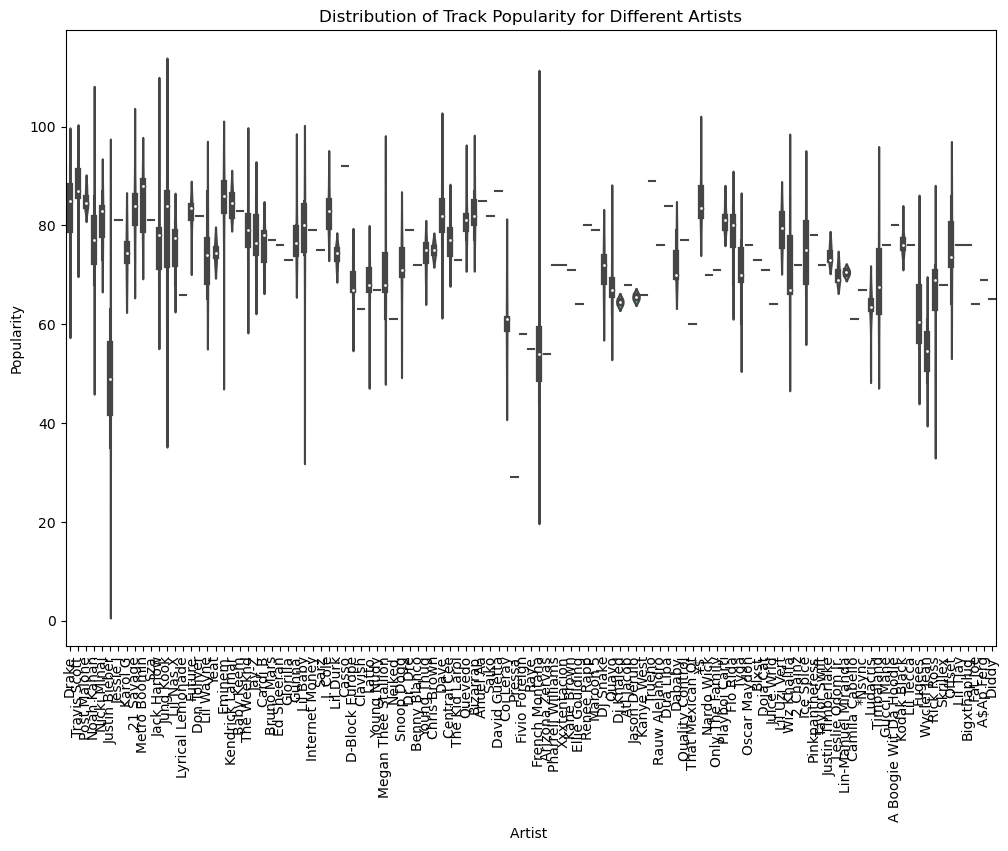

In [43]:
# 10. Distribution of track popularity for different artists
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
file_path = 'spotify.csv'  # Corrected file path
df = pd.read_csv(file_path)

# Data Quality Check: Handle missing values and remove duplicate rows
df_cleaned = df.dropna().drop_duplicates()

# Clean the artist_name column to ensure consistency
df_cleaned['Artist'] = df_cleaned['Artist'].str.strip().str.title()

# 10. Distribution of track popularity for different artists
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Popularity', data=df_cleaned)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist ')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()